# Exercise 2
Coursera - Machine Learning <br>
Andrew Ng

# Logistic Regression

## Visualizing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ==================== Part 1: Plotting ====================
# Set number of significant figures to show
np.set_printoptions(precision=5)

In [3]:
# As alternative to pd.read_csv, np.loadtxt can be used to upload .txt data
data = np.loadtxt('ex2data1.txt', delimiter = ',')
data[:10]

array([[34.62366, 78.02469,  0.     ],
       [30.28671, 43.895  ,  0.     ],
       [35.84741, 72.9022 ,  0.     ],
       [60.1826 , 86.30855,  1.     ],
       [79.03274, 75.34438,  1.     ],
       [45.08328, 56.31637,  0.     ],
       [61.10666, 96.51143,  1.     ],
       [75.02475, 46.55401,  1.     ],
       [76.09879, 87.42057,  1.     ],
       [84.43282, 43.53339,  1.     ]])

In [4]:
# Data type of data
data.dtype

dtype('float64')

In [5]:
X = data[:, :2]
y = data[:, 2]

In [6]:
# Find indices of positive and negative example
# (student who got admitted and not admitted)
pos = np.nonzero(y)
neg = np.where(y==0)

In [7]:
pos

(array([ 3,  4,  6,  7,  8,  9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30,
        31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66,
        68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88,
        90, 91, 93, 94, 95, 96, 97, 98, 99], dtype=int64),)

In [8]:
neg

(array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
        36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
        70, 78, 79, 86, 89, 92], dtype=int64),)

In [9]:
# Admitted and Not admitted matrix
admit = data[pos, :2]
not_admit = data[neg, :2]

In [10]:
# Check shape of admit and not_admit
print("shape of admit: ", admit.shape)
print("shape of not_admit: ", not_admit.shape)

shape of admit:  (1, 60, 2)
shape of not_admit:  (1, 40, 2)


In [11]:
# Convert shape of admit and not_admit to 2 dimension
admit = admit.reshape(60, 2)
not_admit = not_admit.reshape(40, 2)
print("shape of admit: ", admit.shape)
print("shape of not_admit: ", not_admit.shape)

shape of admit:  (60, 2)
shape of not_admit:  (40, 2)


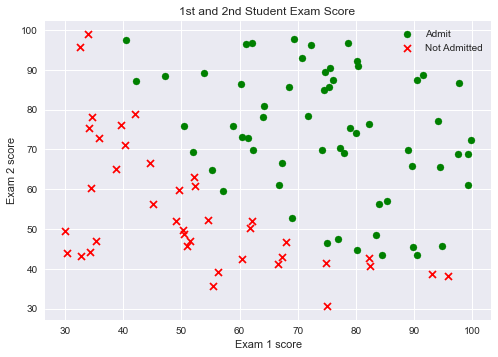

In [12]:
# Plotting data
plt.style.use('seaborn')
adm = plt.scatter(admit[:, 0], admit[:, 1], color='g')
not_adm = plt.scatter(not_admit[:, 0], not_admit[:, 1], color='r', marker='x')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('1st and 2nd Student Exam Score ')
plt.legend((adm, not_adm), ("Admit", "Not Admitted"))
plt.show()

## Implementation

### Sigmoid Function
<img src = "img/sigmoid.jpg">

In [13]:
# Sigmoid function
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [14]:
[m, n] = X.shape
print("m = %d \nn = %d" %(m, n))

m = 100 
n = 2


In [15]:
# Add intercept term to X
X = np.hstack([np.ones((m, 1)), X])
X[:10]

array([[ 1.     , 34.62366, 78.02469],
       [ 1.     , 30.28671, 43.895  ],
       [ 1.     , 35.84741, 72.9022 ],
       [ 1.     , 60.1826 , 86.30855],
       [ 1.     , 79.03274, 75.34438],
       [ 1.     , 45.08328, 56.31637],
       [ 1.     , 61.10666, 96.51143],
       [ 1.     , 75.02475, 46.55401],
       [ 1.     , 76.09879, 87.42057],
       [ 1.     , 84.43282, 43.53339]])

In [16]:
# Y stil in 1D array, convert into 2D array
y = y[:, np.newaxis]

In [17]:
y.shape

(100, 1)

In [18]:
# Theta matrix
initial_theta = np.zeros((n+1, 1))
print(initial_theta)

[[0.]
 [0.]
 [0.]]


### Cost function and gradient descent
<img src = "img/cost-funct-sigmoid.jpg">
<b>And the gradient descent defined as</b>
<img src = "img/grad-descent-sigmoid.jpg">

In [19]:
# ============ Part 2: Compute Cost and Gradient ============
# Cost function in logistic regression
def costFunction(theta, X, y):
    z = np.dot(X, theta)
    g_z = sigmoid(z) # Use sigmoid function for hypothesis in logistic regression
    
    #Cost function
    J = 1/m * np.sum([(-y * np.log(g_z))-(1-y)*(np.log(1-g_z))])
    
    # Grad descent
    grad = (X.T).dot((g_z-y)) * 1/m
    
    return J, grad

In [20]:
[J1, grad1] = costFunction(initial_theta, X, y)
print("Cost function with zero theta: %.3f" %J1)
print("Grad descent with zero theta:\n", grad1)

Cost function with zero theta: 0.693
Grad descent with zero theta:
 [[ -0.1    ]
 [-12.00922]
 [-11.26284]]


In [21]:
grad1.shape

(3, 1)

In [22]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
test_theta

array([[-24. ],
       [  0.2],
       [  0.2]])

In [23]:
[J2, grad2] = costFunction(test_theta, X, y)
print("Cost function with zero theta: %.3f" %J1)
print("Grad descent with zero theta:\n", grad1)

Cost function with zero theta: 0.693
Grad descent with zero theta:
 [[ -0.1    ]
 [-12.00922]
 [-11.26284]]


### Learning parameters using fminunc

In [24]:
# ============= Part 3: Optimizing using fminunc  =============
import scipy.optimize as opt

In [25]:
# to change the behaviour of numpy's division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [26]:
# fmin_tnc will return tuple with first element is the optimized theta
result = opt.fmin_tnc(func=costFunction, 
                      x0=initial_theta.flatten(),
                      args=(X, y.flatten())) 

In [27]:
opt_theta = result[0]
print('Theta found by optimization are:', opt_theta) # Now use this theta to compute cost using previous function

Theta found by optimization are: [-25.16132   0.20623   0.20147]


In [28]:
# Convert opt_theta to 3 x 1 2D array
theta = opt_theta[:, np.newaxis]

In [29]:
theta.shape

(3, 1)

In [30]:
X.shape

(100, 3)

In [31]:
# Cost function obtained using optimaized theta
[J3, grad3] = costFunction(theta, X, y)

In [32]:
print('Cost at theta found by fminunc: %.5f\n' %J3);
print('Expected cost (approx): 0.203\n');
print('theta: \n', theta, '\n');
print('Expected theta (approx):');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.20350

Expected cost (approx): 0.203

theta: 
 [[-25.16132]
 [  0.20623]
 [  0.20147]] 

Expected theta (approx):
 -25.161
 0.206
 0.201



In [33]:
# Plot Boundary
def plotDecisionBoundary(theta, X, y):
    if X.shape[1] <= 3:
        plot_x = np.array([X[:, 1].min()-2, X[:, 1].max()+2])
        check1 = X[:, 1].min()
        check2 = X[:, 1].max()
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0]) 
    
    # Plotting decision boundary
    plt.style.use('seaborn')
    adm = plt.scatter(admit[:, 0], admit[:, 1], color='g')
    not_adm = plt.scatter(not_admit[:, 0], not_admit[:, 1], color='r', marker='x')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('1st and 2nd Student Exam Score ')
    plt.legend((adm, not_adm), ("Admit", "Not Admitted"))
    plt.plot(plot_x, plot_y, '--')
    plt.show()

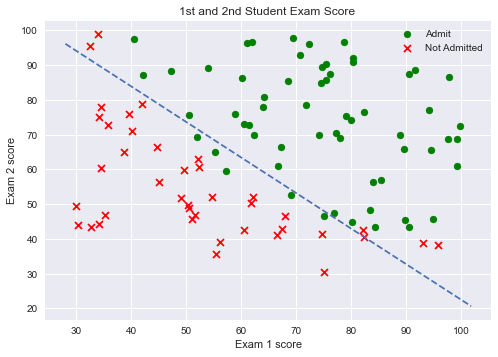

In [34]:
plotDecisionBoundary(opt_theta, X, y)

### Evaluating logistic regression 

After learning the parameters, you'll like to use it to predict the outcomes
on unseen data. In this part, you will use the logistic regression model
to predict the probability that a student with score 45 on exam 1 and 
score 85 on exam 2 will be admitted

Furthermore, you will compute the training and test set accuracies of 
our model.

In [35]:
#  ============== Part 4: Predict and Accuracies ==============
def predict(theta, X):
    m = X.shape[0] # Number of training examples
    p = np.zeros([m]);
    
    p = sigmoid(X @ theta)
    
    for i in range(m):
        if p[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    return p

In [36]:
prob = sigmoid(np.array([1.0, 45.0, 85.0]) @ theta)

In [37]:
print('For a student with scores 45 and 85, we predict an admission: %.6f' %prob)
print('Expected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85, we predict an admission: 0.776291
Expected value: 0.775 +/- 0.002



In [38]:
# Compute accuracy on our training set
p = predict(theta, X);

In [39]:
acc = (np.sum(y == p)/y.size)*100

In [40]:
print('Train Accuracy: %.3f' %acc)
print('Expected accuracy (approx): 89.0\n')

Train Accuracy: 89.000
Expected accuracy (approx): 89.0

